# Classification

## MNIST

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# # run this cell to import the MNIST dataset. It takes a few minutes.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # extra code – we only use data and target in this notebook






dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [1]:
# alternate way to load MNIST, if you have already downloaded it
import pickle
# Specify the file path of the saved workspace
load_path = "mnist.pkl"

# Load the workspace from the file using pickle
with open(load_path, "rb") as f:
    loaded_workspace = pickle.load(f)

mnist = loaded_workspace


In [2]:
import pandas as pd
import numpy as np

# # The MNIST dataset was downloaded from OpenML.org. X is the data, y is the target.
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)



(70000, 784)
(70000,)


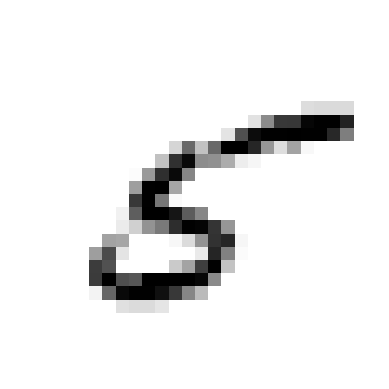

5


In [6]:
index=191
some_digit = X.iloc[index]  
some_digit_image = np.array(some_digit).reshape(28, 28) # reshape it to plot it

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print(y[index])

In [3]:
y=y.astype(np.uint8)

# split the data into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # 60,000 for training, 10,000 for testing
print(X_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


## Train a binary classifier

In [8]:
# # Training a Binary Classifier
# # Let's simplify the problem for now and only try to identify one digit – for example, the number 5. This "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create the target vectors for this classification task:

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)


In [9]:

# # Stochastic Gradient Descent (SGD) classifier
# This classifier has the advantage of being capable of handling very large datasets efficiently.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # create the classifier object with a random state of 42
sgd_clf.fit(X_train, y_train_5) # train the classifier on the training set of 5s and not-5s


SGDClassifier(random_state=42)

In [10]:
# VAlidate the model on original digit
sgd_clf.predict([some_digit])

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

In [11]:
# # Performance Measures

# ## Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the sgd_clf model trained above

#output is an array of accuracy scores, one for each fold

array([0.95035, 0.96035, 0.9604 ])

In [12]:
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="f1")

array([0.63126625, 0.74460548, 0.79375   ])

In [13]:
from sklearn import metrics

metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [14]:
# Never5Classifier
# Let's look at a very dumb classifier that just classifies every single image in the "not-5" class:

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # do nothing
    def predict(self, X): # always predict that the digit is not 5
        return np.zeros((len(X), 1), dtype=bool) # return an array of False values
    

never_5_clf = Never5Classifier() # create an instance of the class
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the never-5 classifier



array([0.91125, 0.90855, 0.90915])

In [15]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="f1") # 3-fold cross-validation on the training set using the never-5 classifier

array([0., 0., 0.])

## Confusion matrix

In [16]:
# ## Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # return the prediction on if each number is a 5 made on each test fold (i.e., the predictions made on each instance when it was in the test set)
y_train_pred.shape

(60000,)

In [17]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
# The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
# assume that we have a perfect classifier, that makes no mistakes
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [19]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 687),
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891)

0.8370879772350012


0.6511713705958311

In [20]:

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

## Precision/Recall Trade-off

In [21]:

# ## Precision/Recall Tradeoff

y_scores = sgd_clf.decision_function([some_digit]) # return the confidence score for each instance.  Measure of how much the classifier believes that the instance is positive (5 in this case)
y_scores


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([8574.08617017])

In [22]:
# Let's raise the threshold:

threshold = 8000
y_some_digit_pred = (y_scores > threshold) 
y_some_digit_pred 

array([ True])

In [23]:
# # How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                method="decision_function")


In [24]:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


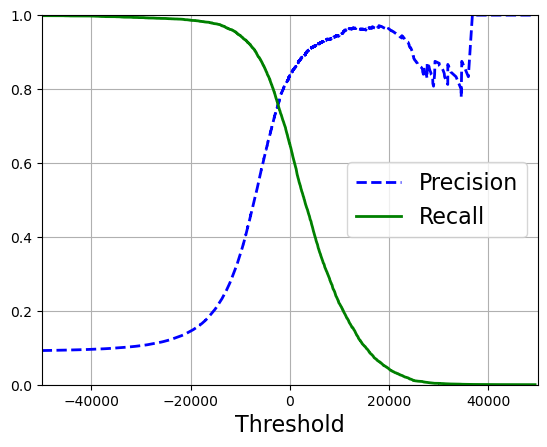

<Figure size 800x400 with 0 Axes>

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # plot precision as a function of the threshold
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # plot recall as a function of the threshold
    plt.legend(loc="center right", fontsize=16) # add a legend
    plt.xlabel("Threshold", fontsize=16)        # add x label
    plt.grid(True)                              # add grid
    plt.axis([-50000, 50000, 0, 1])             # set axis limits
    plt.figure(figsize=(8, 4))                      # set figure size

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


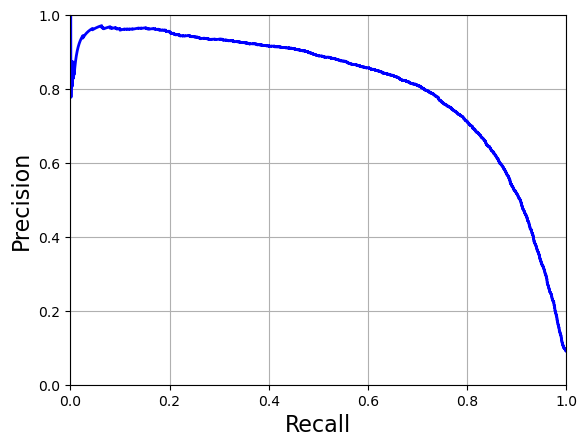

<Figure size 800x600 with 0 Axes>

In [26]:
# Another way to select a good precision/recall tradeoff is to plot precision directly against recall, as shown in the following code:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2) # plot precision as a function of recall
    plt.xlabel("Recall", fontsize=16)               # add x label
    plt.ylabel("Precision", fontsize=16)            # add y label
    plt.axis([0, 1, 0, 1])                          # set axis limits
    plt.grid(True)                                  # add grid
    plt.figure(figsize=(8, 6))                      # set figure size

plot_precision_vs_recall(precisions, recalls)

In [27]:
# You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 60% recall. But of course the choice depends on your project.

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # find the lowest threshold that gives you at least 90% precision
threshold_90_precision


3370.019499143957

In [28]:
# To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

y_train_pred_90 = (y_scores >= threshold_90_precision) # return an array of True/False values
y_train_pred_90


array([False, False, False, ...,  True, False, False])

In [29]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90)) 
f1_score(y_train_5, y_train_pred_90)

0.9000345901072293
0.4799852425751706


0.626082771896054

## ROC Curve

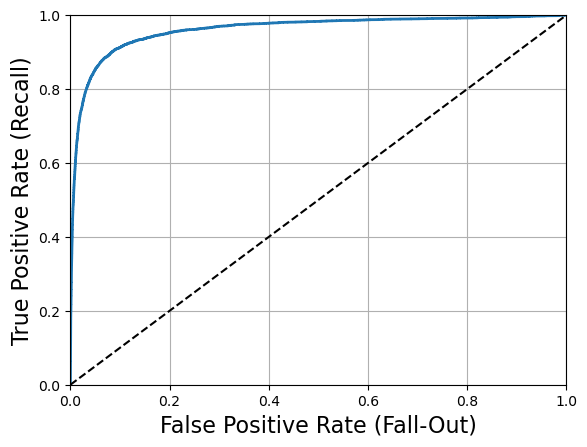

<Figure size 800x600 with 0 Axes>

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # compute the TPR and FPR for various threshold values

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) # plot the FPR against the TPR
    plt.plot([0, 1], [0, 1], 'k--') # plot the dashed diagonal
    plt.axis([0, 1, 0, 1]) # set axis limits
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # add x label
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) # add y label
    plt.grid(True) # add grid
    plt.figure(figsize=(8, 6)) # set figure size

plot_roc_curve(fpr, tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) # compute the area under the curve (AUC)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) # create a new classifier instance

# This step takes a forest_clf instance and calls its fit() method, passing it the training data and the training targets in a CV fashion
# The method takes care of training all the trees in the forest using the training set (X_train) and the corresponding training targets (y_train_5)
# Returns an array containing a row per instance and a column per class (0=not 5, 1=5) containing the probability that the given instance belongs to the given class
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba") 


In [33]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest) # compute the TPR and FPR for various threshold values


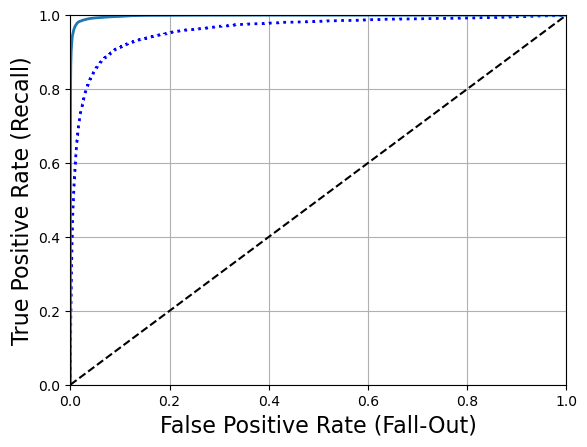

<Figure size 800x600 with 0 Axes>

In [34]:
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD") # plot the SGD ROC curve
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") # plot the Random Forest ROC curve
# add legend, axis label and grid
# .legend(loc="lower right", fontsize=16)


plt.show()

In [35]:
# output the AUC score
print(roc_auc_score(y_train_5, y_scores_forest))


0.9983436731328145


In [36]:

# output the precision and recall scores
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5, y_train_pred_forest)) # 99.0% precision: 99% of the positive predictions are correct
print(recall_score(y_train_5, y_train_pred_forest)) # 86.6% recall: 86.6% of the positive cases are identified


0.9905083315756169
0.8662608374838591


## Multiclass classification

### NOTE: some of these trainings take a long time on the full data set when run on my laptop.  Consider using a smaller data set or running on more powerful machine.


TRAIN a support vector classifier

In [37]:
from sklearn.svm import SVC

#tesing a binary classifier on a multiclass dataset
# sKlearn detects when you try to use a binary classification algorithm for a multiclass classification task
# it automatically runs OvA (except for SVM classifiers for which it uses OvO)

svm_clf = SVC() # create a new classifier instance
svm_clf.fit(X_train, y_train) # train the classifier

# 10m.42s

SVC()

Validate predictions for a random number

In [40]:
index=190
some_digit = X.iloc[index]
svm_clf.predict([some_digit]) # predict the label of the digit


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

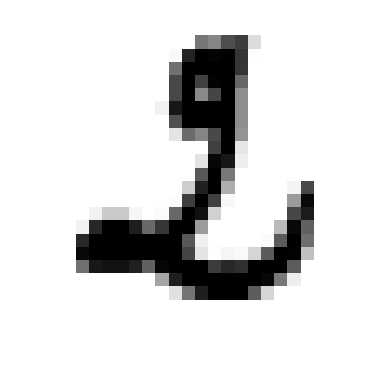

This number is labeled as a  2
The model predicts it is a  [2]


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
  
some_digit_image = np.array(some_digit).reshape(28, 28) # reshape it to plot it

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print("This number is labeled as a ", y[index])
print("The model predicts it is a ", svm_clf.predict([some_digit]))




In [45]:
# show the 10 scores per instance (one per class)
# the highest score is the one corresponding to the predicted class
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72821569,  7.20900744,  9.31612143,  6.28110928,  1.71189617,
         3.78756118,  8.28861351, -0.30167419,  4.91038543,  1.69858034]])

In [48]:
# confirming the class assignment of the highest score.  In general, the index won't equal the class, but in this case it does.
print(np.argmax(some_digit_scores))
print(svm_clf.classes_)
print(svm_clf.classes_[np.argmax(some_digit_scores)])

2
[0 1 2 3 4 5 6 7 8 9]
2


TRAIN an SVC using OVR approach (SLOW!!!)

In [49]:
# # changing the type of classifier from OVO to OVR
# # takes >22min to run!!
# from sklearn.multiclass import OneVsRestClassifier
# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# #confirming prediction and number of estimators in OvR classifier
# print(ovr_clf.predict([some_digit]))
# print(len(ovr_clf.estimators_)) #should be 10
# print(len(svm_clf.estimators_)) #should be 

In [50]:
# train an SGD classifier on the whole data
sgd_clf.fit(X_train, y_train)

#Time: 4min

SGDClassifier(random_state=42)

In [54]:
print(sgd_clf.predict([some_digit]))
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

[2]


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-5.31283526e+04, -1.87113911e+04, -1.61274917e+01,
        -7.13755939e+03, -2.94497828e+04, -1.82459145e+04,
        -6.53921095e+03, -4.41236770e+04, -1.00368703e+04,
        -2.97390908e+04]])

Testing use of "cross_validate" to get scores and predictions simultaneously. Didn't really work.

In [57]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy'] #can also use 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'

# evaluate the model's accuracy using cross-validation
results=cross_validate(sgd_clf, X_train, y_train, cv=3, scoring=scoring, return_estimator=True, return_train_score=False)
cross_val_scores=results['test_accuracy']
print(cross_val_scores)
cross_val_predictions=[estimator.predict(X_train) for estimator in results['estimator']]
#originally took 6min to run
#predicting the accuracy of the model: [0.87365, 0.85835, 0.8689 ]


print("Cross-validated Scores:", cross_val_scores)
print("Cross-validated Predictions:", cross_val_predictions[0])


[0.87365 0.85835 0.8689 ]
Cross-validated Scores: [0.87365 0.85835 0.8689 ]
Cross-validated Predictions: [array([5, 0, 4, ..., 4, 5, 6], dtype=uint8), array([5, 0, 2, ..., 4, 5, 6], dtype=uint8), array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)]


In [67]:
# scaling the input data to improve the accuracy of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [ ]:

# cross validation
from sklearn.model_selection import cross_val_score
cross_val_scores=cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("Cross-validated Scores:", cross_val_scores)

#16 minutes!!

# Error Analysis

First look at the confusion matrix for the last model

In [68]:
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


In [96]:
#output accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8970333333333333

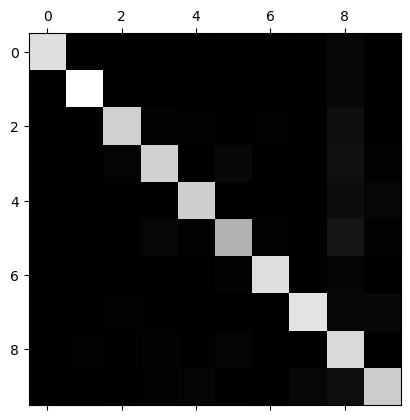

In [71]:

# compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_train, y_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

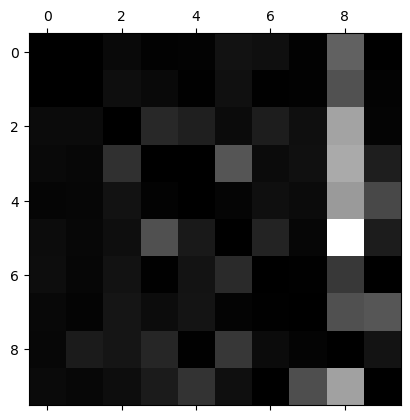

In [72]:
row_sums= conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

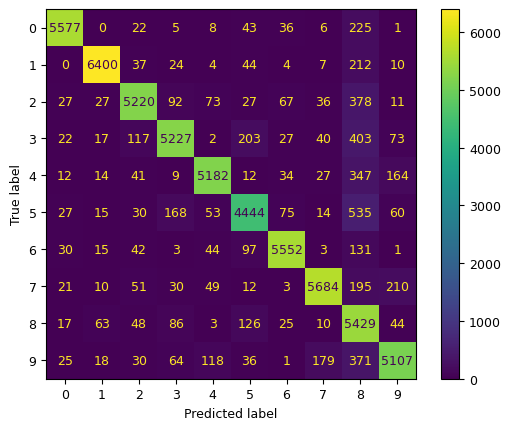

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.show()

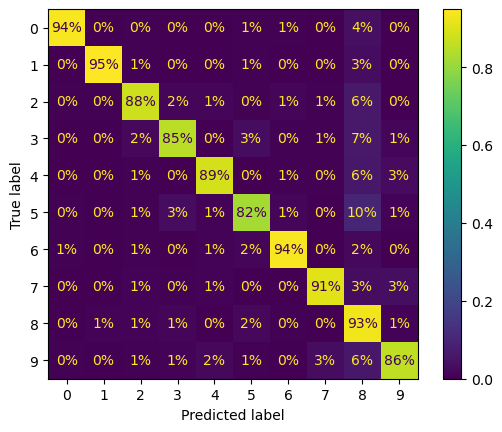

In [77]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()

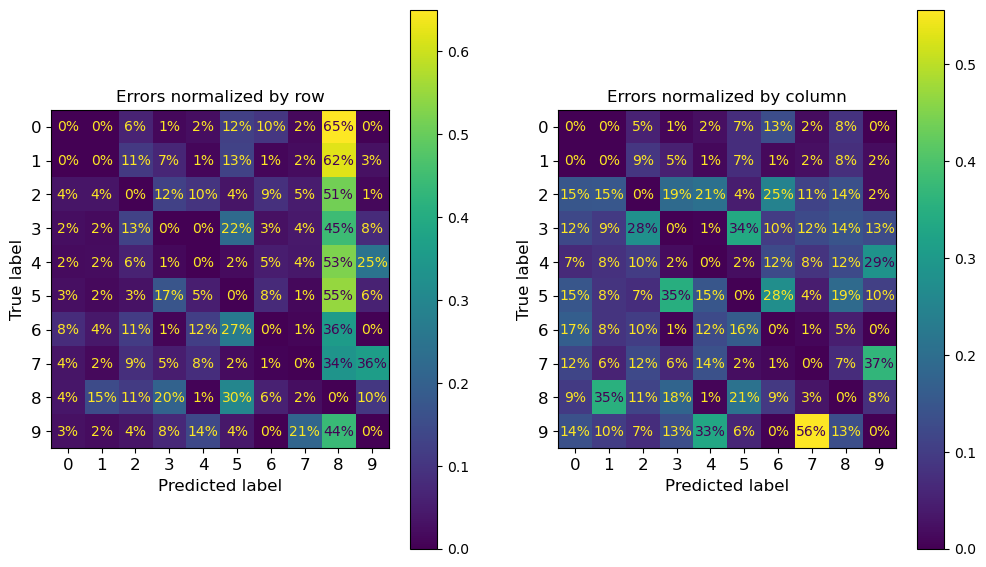

In [83]:
# extra code – this cell generates and saves Figure 3–10

sample_weight = (y_pred != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=12)  # make fonts great again

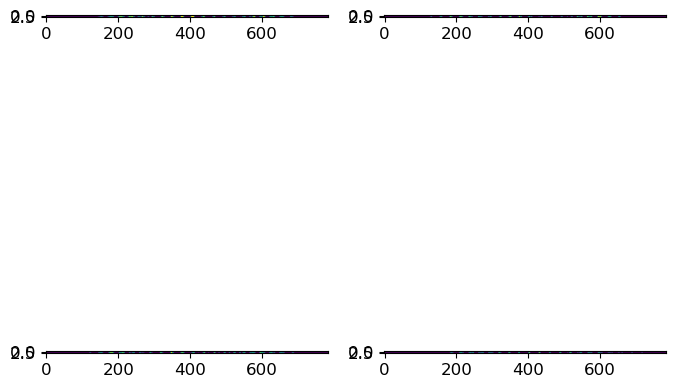

In [95]:
# Visulization fail

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_pred == cl_a)] # 3s classified as 3s
X_ab = X_train[(y_train == cl_a) & (y_pred == cl_b)] # 3s classified as 5s
X_ba = X_train[(y_train == cl_b) & (y_pred == cl_a)] # 5s classified as 3s
X_bb = X_train[(y_train == cl_b) & (y_pred == cl_b)] # 5s classified as 5s

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(X_aa[:5]) # 3s classified as 3s
plt.subplot(222); plt.imshow(X_ab[:5]) # 3s classified as 5s
plt.subplot(223); plt.imshow(X_ba[:5]) # 5s classified as 3s
plt.subplot(224); plt.imshow(X_bb[:5]) # 5s classified as 5s
plt.show()

### Multilabel classification

In [98]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # True for all 7, 8, 9
y_train_odd = (y_train % 2 == 1) # True for all odd numbers
y_multilabel = np.c_[y_train_large, y_train_odd] # Creates a 2D array with the two columns being the two arrays above

knn_clf = KNeighborsClassifier() # Creates a KNN classifier
y_train_knn_pred= cross_val_predict(knn_clf, X_train_scaled, y_multilabel, cv=3) # Creates a prediction for each label

In [103]:
from sklearn.metrics import f1_score, classification_report

f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9613989329409902

In [110]:
print(classification_report(y_multilabel, y_train_knn_pred))
print(y_train_knn_pred[0])
print(y_multilabel[0])


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18065
           1       0.96      0.98      0.97     30508

   micro avg       0.96      0.97      0.96     48573
   macro avg       0.96      0.96      0.96     48573
weighted avg       0.96      0.97      0.96     48573
 samples avg       0.58      0.58      0.58     48573

[False  True]
[False  True]


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Multioutput Classification

In [4]:
#remove noise from images

noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise # add noise to training set
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train #original images
y_test_mod=X_test
X_test_mod.shape


(10000, 784)

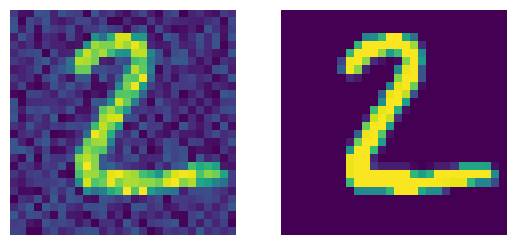

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

some_index=1
def plot_digit(data):
    image_array=data.to_numpy()
    image=image_array.reshape(28,28)
    plt.imshow(image,interpolation="nearest")
    plt.axis("off")


plt.subplot(121);plot_digit(X_test_mod.iloc[some_index]) #plot_digit is a function defined in the book
plt.subplot(122);plot_digit(y_test_mod.iloc[some_index])
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier() # Get the best parameters from the grid search
knn_clf.fit(X_train_mod, y_train_mod) # Train a model to recognize noise and remove it


KNeighborsClassifier()

In [14]:
X_train_mod.iloc[0:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,98.0,36.0,30.0,73.0,29.0,27.0,66.0,36.0,30.0,32.0,...,70.0,51.0,11.0,1.0,99.0,17.0,50.0,61.0,52.0,8.0


In [22]:

clean_digit = knn_clf.predict(X_test_mod.iloc[1:2]) # Predict the digit


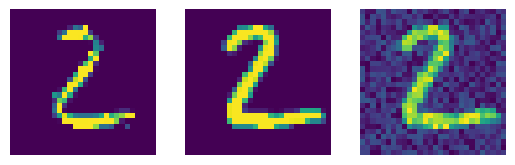

In [25]:
clean_digit_df= pd.DataFrame(clean_digit) # Convert to a dataframe
plt.subplot(131);plot_digit(clean_digit_df) #plot_digit is a function defined in the book
plt.subplot(132);plot_digit(y_test_mod.iloc[some_index])
plt.subplot(133);plot_digit(X_test_mod.iloc[some_index])
plt.show()

### Extra stuff

C:\Users\meadows\AppData\Local\Temp\ipykernel_16092\1749628581.py:3: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


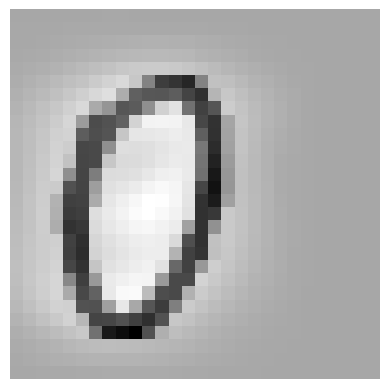

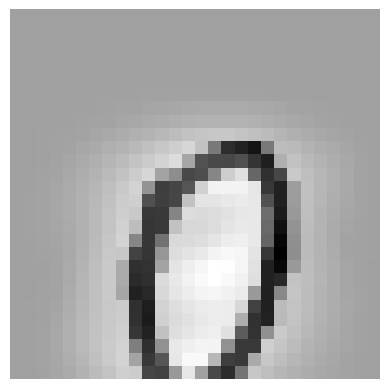

In [117]:
#create a function which shifts an MNIST image by 1 pixel in each direction
import numpy as np
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode = "constant")
    return shifted_image

#shift the image by 5 pixels in each direction
image = X_train_scaled[1000,:]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.imshow(shifted_image_left, cmap="binary")
plt.axis("off")
plt.show()
plt.imshow(shifted_image_down, cmap="binary")
plt.axis("off")
plt.show()


In [139]:
import pandas as pd

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'Country': ['USA', 'Canada', 'UK']}
df = pd.DataFrame(data)

# Display a specific row using iloc
row_index = 1  # Replace with the desired row index
row_data = df.iloc[row_index]

print("Row at index", row_index, ":\n", row_data)

# Display a specific row as a DataFrame using loc and slicing
row_index = 1  # Replace with the desired row index
row_dataframe = df.loc[row_index:row_index]

print("Row at index", row_index, ":\n", row_dataframe)

Row at index 1 :
 Name          Bob
Age            30
Country    Canada
Name: 1, dtype: object
Row at index 1 :
   Name  Age Country
1  Bob   30  Canada
